Writing the narrative.

In [1]:
import pickle
import math
import numpy as np
import matplotlib.pyplot as plt

TOTALS = pickle.load(open('../data/Detailed_Sex_RaceEthnicity_Graduates.p', 'rb'))
GRAD_TOTALS = pickle.load(open('../data/Sex_Graduates.p', 'rb'))

years = sorted(TOTALS.keys())
institutions = sorted(TOTALS[ max(years) ].keys())
fields = sorted(TOTALS[ max(years) ]['Columbia University in the City of New York'].keys())

In [2]:
# Convenient function for making subplots for every institution
def subplots(num=len(institutions), cols=2, figsize=8):
    rows = math.ceil(num / cols)
    return plt.subplots(rows, cols, figsize=(figsize * cols, figsize * rows))

# Returns female proportions for an institution
def get_inst_proportions(totals, inst):
    props = []
    for year in years:
        inst_data = totals[year][inst]
        props.append(inst_data['Female'] / inst_data['Total for selected values'])
    return props

def plot_inst_proportions(totals, title, highlight='Columbia University in the City of New York'):
    plt.figure(figsize=(8, 8))

    for inst in institutions:
        if inst != highlight:
            plt.plot(years, get_inst_proportions(totals, inst), label=inst)
    plt.plot(years, get_inst_proportions(totals, highlight), label=highlight, color='black', linewidth=3)
    
    plt.plot(years, [0.5 for _ in years], color='lightgray', linestyle='--')
    plt.ylim(bottom=0, top=1)
    
    plt.ylabel('Proportion female')
    plt.title(title)
    plt.legend(loc='upper right')
    plt.grid()

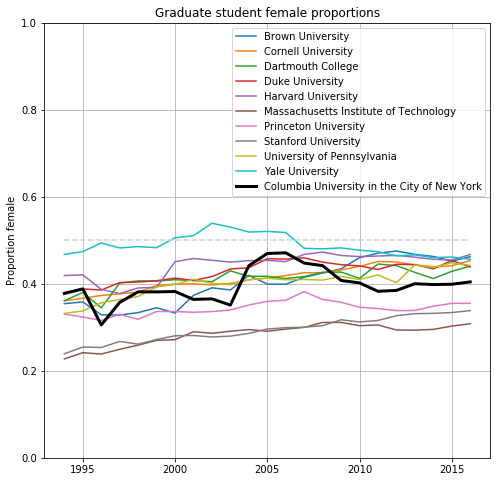

In [3]:
plot_inst_proportions(GRAD_TOTALS, 'Graduate student female proportions')

In [7]:
# Returns female and male headcounts for a field in an institution
def get_counts(field, inst='Columbia University in the City of New York'):
    females = []
    males = []
    for year in years:
        stats = TOTALS[year][inst].get(field, None)
        if stats is None:
            females.append(0)
            males.append(0)
            continue
        females.append(stats['Female']['Total for selected values'])
        males.append(stats['Male']['Total for selected values'])
    return females, males
    
# Plots a female vs. male connected scatter plot
def plot_connected(ax, field, inst='Columbia University in the City of New York', line=True, title=None):
    females, males = get_counts(field, inst)
    if line: ax.plot(females, males, color='lightgray')
    ax.scatter(females, males, c=[i for i in range(len(males))], cmap='viridis')
    
    for i in [0, -1]:
        ax.annotate(years[i], (females[i], males[i]))
    
    _, ymax = ax.get_ylim()
    _, xmax = ax.get_xlim()
    top = max(ymax, xmax)
    
    ax.set_ylim(bottom=0, top=top)
    ax.set_xlim(left=0, right=top)
    
    ax.plot([0, 1000], [0, 1000], color='gray', linestyle='--')

    ax.set_title(title or f'{field}: Columbia, men vs. women')
    ax.set_xlabel('Number of women')
    ax.set_ylabel('Number of men')
    ax.grid()

In [20]:
# Returns female proportions for an institution in a field
def get_proportions(inst, field):
    proportions = []
    for year in years:
        field_stats = TOTALS[year][inst].get(field, None)
        if field_stats is None:
            proportions.append(None)
        else:
            fem_count = field_stats.get('Female', 0)
            if isinstance(fem_count, dict):
                fem_count = fem_count['Total for selected values']
                
            proportions.append(
                fem_count /
                    field_stats['Total for selected values']['Total for selected values']
            )
    return proportions

# Plots female proportions for every institution for a field, highlighting one, in a line graph
def plot_inst(ax, field, highlight='Columbia University in the City of New York', insts=institutions, title=None):
    for inst in insts:
        if inst == highlight:
            continue
        ax.plot(years, get_proportions(inst, field), label=inst)
    ax.plot(years, get_proportions(highlight, field), label=highlight, linewidth=3, color='black')
    
    ax.set_ylabel('Percent female')
    ax.legend()
    ax.set_ylim(top=1, bottom=0)
    ax.set_title(title or f'{field}: Comparing Columbia\'s peers')
    
    # Format y tick labels to be percentages
    vals = ax.get_yticks()
    ax.set_yticklabels(['{:,.0%}'.format(x) for x in vals])

'Mechanical engineering': [[6, 83], [2, 80], [6, 85], [8, 82], [8, 67], [7, 67], [5, 57], [8, 40], [6, 45], [7, 58], [11, 56], [9, 66], [7, 78], [10, 87], [20, 103], [26, 136], [31, 141], [28, 152], [33, 159], [41, 171], [48, 179], [48, 203], [57, 269]]


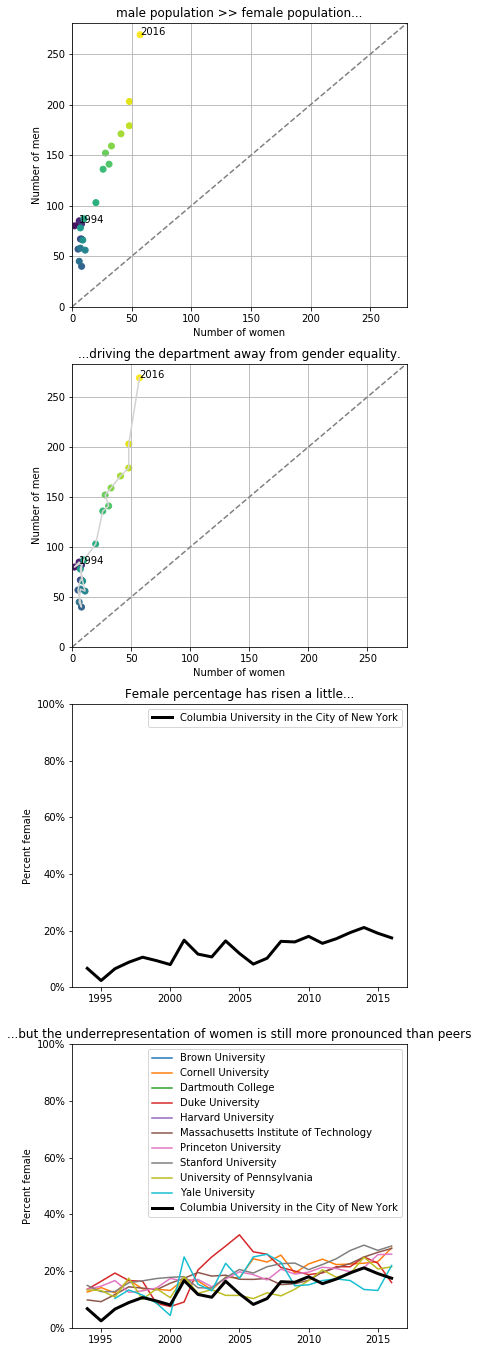

In [22]:
fig, ax = subplots(4, cols=1, figsize=6)

plot_connected(ax[0], 'Mechanical engineering', line=False, title='male population >> female population...')
female, male = get_counts("Mechanical engineering")
print(f'\'Mechanical engineering\': {[list(x) for x in zip(female, male)]}')

plot_connected(ax[1], 'Mechanical engineering', title='...driving the department away from gender equality.')
plot_inst(ax[2], 'Mechanical engineering', insts=[], title='Female percentage has risen a little...')
plot_inst(ax[3], 'Mechanical engineering', title='...but the underrepresentation of women is still more pronounced than peers')